In [44]:
# TODO: Import libraries required here
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [45]:
# Using MNIST dataset: 28x28 grayscale images
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add channel dimension (CNN expects 3D inputs)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)
# Each image is 28×28 pixels, grayscale (1 channel).
# Normalization helps the model learn faster.

Training set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)


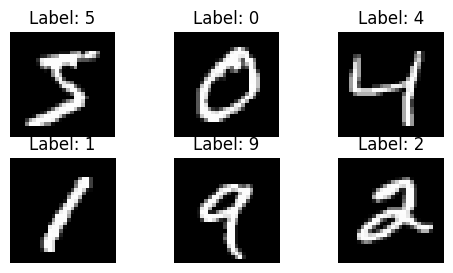

In [46]:
# Show images
plt.figure(figsize=(6,3))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# What do you notice about how similar some digits look?
# Things to think about: What do you notice about how similar some digits look?

In [47]:
#Building a simple CNN

model = models.Sequential([
    # TODO: Add first Conv2D layer (32 filters, 3x3 kernel, 'relu', input_shape=(28,28,1))
    # layers.Conv2D(...),
    layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),

    # TODO: Add MaxPooling layer (2x2)
    # layers.MaxPooling2D(...),
    layers.MaxPooling2D((2, 2)),

    # TODO: Add second Conv2D layer (64 filters, 3x3, 'relu')
    # layers.Conv2D(...),
    layers.Conv2D(64, (3, 3), activation = 'relu'),

    # TODO: Add second MaxPooling layer
    # layers.MaxPooling2D(...),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    # TODO: Add Dense layer with 64 units, 'relu' activation
    # layers.Dense(...),
    layers.Dense(64, activation = 'relu'),

    # TODO: Add final Dense layer with 10 units, 'softmax' activation
    # layers.Dense(...)
    layers.Dense(10, activation = 'softmax')
])

model.summary()

# Exercise:
# Why do early layers detect edges and later layers detect shapes? Discuss.

c:\Coding Stuff\general-project-fall25\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Compile the Model

# TODO: Compile the model using:
# optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
# model.compile(...)
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [52]:
# Evaluate the Model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# TODO: Evaluate test accuracy
# test_loss, test_acc = model.evaluate(...)
test_loss, test_acc = model.evaluate(x_train, y_train)

print(f"\nTest accuracy: {test_acc:.3f}")

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9466 - loss: 0.1775 - val_accuracy: 0.9837 - val_loss: 0.0579
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9838 - loss: 0.0528 - val_accuracy: 0.9868 - val_loss: 0.0441
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9890 - loss: 0.0362 - val_accuracy: 0.9872 - val_loss: 0.0434
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9910 - loss: 0.0290 - val_accuracy: 0.9883 - val_loss: 0.0425
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9931 - loss: 0.0216 - val_accuracy: 0.9917 - val_loss: 0.0340
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9947 - loss: 0.0175

Test accuracy: 0.995


In [53]:
# Make Predictions

# TODO: Predict the first 9 test images
# predictions = model.predict(...)
predictions = model.predict(x_test[:9])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


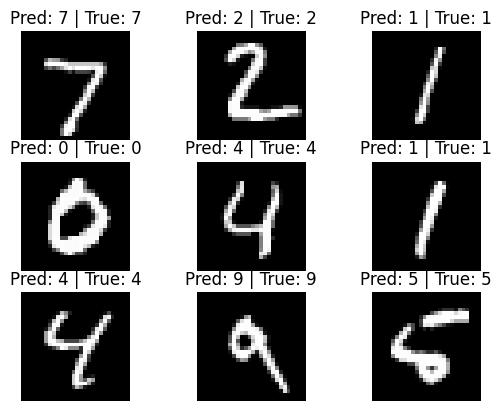

In [57]:
# Run this:
# plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    # TODO: Display predicted and true label
    plt.title(f"Pred: {predictions[i].argmax()} | True: {y_test[i]}")
    plt.axis('off')
plt.show()

# Exercise:
# What kind of patterns do you think the CNN looked at to decide each number?